# 1. first step to explore the data

> ### before I do any thing i will import the liberaryes I will use in this project 

In [62]:
# for data mangment and manipulation 

import pandas as pd 
import numpy as np

# for visualis data

import matplotlib.pyplot as plt
import seaborn as sns

# for model traing and feature selection

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.feature_selection import * 

### graphes setup and theme

In [63]:
sns.set_style("darkgrid")
theme = sns.color_palette("mako")

importing data 

In [64]:
google_df = pd.read_csv(r"./data/Google_data_cleaned.csv")
sip = '-'*100
google_df

,Unnamed: 0,app,category,rating,reviews,installs,type,price,content_rating,genres,current_ver,android_ver,size(kb),update_month,update_year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3,19000.0,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,14000.0,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,0,0.0,Everyone,Art & Design,1.2.4,4.0.3,8.7,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,0,0.0,Teen,Art & Design,NaN,4.2,25000.0,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,0,0.0,Everyone,Art & Design;Creativity,1.1,4.4,2.8,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,10353,Sya9a Maroc - FR,FAMILY,4.5,38,5000,0,0.0,Everyone,Education,1.48,4.1,53000.0,7,2017
9654,10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100,0,0.0,Everyone,Education,1.0,4.1,3.6,7,2018
9655,10355,Parkinson Exercices FR,MEDICAL,NaN,3,1000,0,0.0,Everyone,Medical,1.0,2.2,9.5,1,2017
9656,10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1000,0,0.0,Mature 17+,Books & Reference,NaN,NaN,NaN,1,2015


In [65]:
print(f"the columns name of the data are \n{google_df.columns}")

the columns name of the data are 
Index(['Unnamed: 0', 'app', 'category', 'rating', 'reviews', 'installs',
       'type', 'price', 'content_rating', 'genres', 'current_ver',
       'android_ver', 'size(kb)', 'update_month', 'update_year'],
      dtype='object')


In [66]:
print(google_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9658 non-null   int64  
 1   app             9658 non-null   object 
 2   category        9658 non-null   object 
 3   rating          8196 non-null   float64
 4   reviews         9658 non-null   int64  
 5   installs        9658 non-null   int64  
 6   type            9658 non-null   int64  
 7   price           9658 non-null   float64
 8   content_rating  9658 non-null   object 
 9   genres          9658 non-null   object 
 10  current_ver     8596 non-null   object 
 11  android_ver     8667 non-null   object 
 12  size(kb)        8432 non-null   float64
 13  update_month    9658 non-null   int64  
 14  update_year     9658 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 1.1+ MB
None


In [67]:
print(google_df.dtypes)

Unnamed: 0          int64
app                object
category           object
rating            float64
reviews             int64
installs            int64
type                int64
price             float64
content_rating     object
genres             object
current_ver        object
android_ver        object
size(kb)          float64
update_month        int64
update_year         int64
dtype: object


In [68]:
google_df.nunique()

Unnamed: 0        9658
app               9658
category            33
rating              39
reviews           5330
installs            20
type                 2
price               92
content_rating       6
genres             118
current_ver       2816
android_ver         25
size(kb)           459
update_month        12
update_year          9
dtype: int64

In [69]:
google_df.isna().sum()

Unnamed: 0           0
app                  0
category             0
rating            1462
reviews              0
installs             0
type                 0
price                0
content_rating       0
genres               0
current_ver       1062
android_ver        991
size(kb)          1226
update_month         0
update_year          0
dtype: int64

In [70]:
google_df.loc[google_df.loc[:,"size(kb)"].isna()]

,Unnamed: 0,app,category,rating,reviews,installs,type,price,content_rating,genres,current_ver,android_ver,size(kb),update_month,update_year
37,37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,5000000,0,0.0,Everyone,Art & Design,NaN,2.3.3,NaN,7,2018
42,42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,10000000,0,0.0,Everyone,Art & Design,NaN,NaN,NaN,7,2018
52,52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,1000000,0,0.0,Everyone,Auto & Vehicles,NaN,NaN,NaN,7,2018
67,67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,5000000,0,0.0,Everyone,Auto & Vehicles,NaN,NaN,NaN,7,2018
68,68,REPUVE,AUTO_AND_VEHICLES,3.9,356,100000,0,0.0,Everyone,Auto & Vehicles,NaN,NaN,NaN,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,10231,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,100000,0,0.0,Everyone,Weather,NaN,NaN,NaN,7,2018
9545,10243,Posta App,MAPS_AND_NAVIGATION,3.6,8,1000,0,0.0,Everyone,Maps & Navigation,NaN,4.4,NaN,9,2017
9583,10283,Chat For Strangers - Video Chat,SOCIAL,3.4,622,100000,0,0.0,Mature 17+,Social,NaN,NaN,NaN,5,2018
9643,10343,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,5000000,0,0.0,Mature 17+,Social,NaN,NaN,NaN,3,2018


In [71]:
google_df.shape

(9658, 15)

In [72]:
google_df.duplicated().sum()

0

# I have noteced some unwanted data and empy cells on the data 

## the unwanted data
they are four columns [unnamed, current_ver, update_month, update_year]

In [73]:
google_df.drop(google_df.columns[[0, 10, -2, -1]],axis=1,inplace=True)

In [74]:
google_df.isna().sum()

app                  0
category             0
rating            1462
reviews              0
installs             0
type                 0
price                0
content_rating       0
genres               0
android_ver        991
size(kb)          1226
dtype: int64

> ## filling empty cells with the best crosponding values

filling the empty cells of rating column based on category

In [75]:
median_rating =dict(google_df.groupby("category")["rating"].median())

for key in median_rating:
    value = median_rating[key]
    data = google_df[google_df["category"] == key]
    google_df["rating"][google_df["category"] == key] = data["rating"].fillna(value);

/tmp/ipykernel_883/1834620958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df["rating"][google_df["category"] == key] = data["rating"].fillna(value);
/tmp/ipykernel_883/1834620958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df["rating"][google_df["category"] == key] = data["rating"].fillna(value);
/tmp/ipykernel_883/1834620958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df["rating"][google_df

In [76]:
print(google_df.isna().sum())

app                  0
category             0
rating               0
reviews              0
installs             0
type                 0
price                0
content_rating       0
genres               0
android_ver        991
size(kb)          1226
dtype: int64


filling andrioid_ver from the most supported verison 

In [77]:
mode_ver =google_df["android_ver"].mode()[0]

google_df["android_ver"].fillna(mode_ver, inplace=True)

In [78]:
print(google_df.isna().sum())

app                  0
category             0
rating               0
reviews              0
installs             0
type                 0
price                0
content_rating       0
genres               0
android_ver          0
size(kb)          1226
dtype: int64


filling size column with the avarge of each catigory

In [79]:
avarge = dict(google_df.groupby(["category"])["size(kb)"].mean())

for key in median_rating:
    value = median_rating[key]
    data = google_df[google_df["category"] == key]
    google_df["size(kb)"][google_df["category"] == key] = data["size(kb)"].fillna(value);

/tmp/ipykernel_883/3359574246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df["size(kb)"][google_df["category"] == key] = data["size(kb)"].fillna(value);
/tmp/ipykernel_883/3359574246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df["size(kb)"][google_df["category"] == key] = data["size(kb)"].fillna(value);
/tmp/ipykernel_883/3359574246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_df["size(kb)"]

In [80]:
print(google_df.isna().sum())

app               0
category          0
rating            0
reviews           0
installs          0
type              0
price             0
content_rating    0
genres            0
android_ver       0
size(kb)          0
dtype: int64


> # Q and A 
> <hr styel="theme:red;">
> <ol>
> <li>What is the most supported android version?</li>
> <li>What is the most reted gunara of games?</li>
> <li>Find top 10 social media apps by rating</li>
> <li>Find top 10 games by rating</li>
> <li>What is the most expensiev app and what its rating</li>
> <li>top 10 action games</li>
> <li>What is The avarge size for games?</li>
> <li>What is the avarge size of social media apps?</li>
> <li>What is the most number of reviews and for which app?</li>
> <li>What is the % of paid and free apps?</li>
></ul>

the most supported android version is 4.1


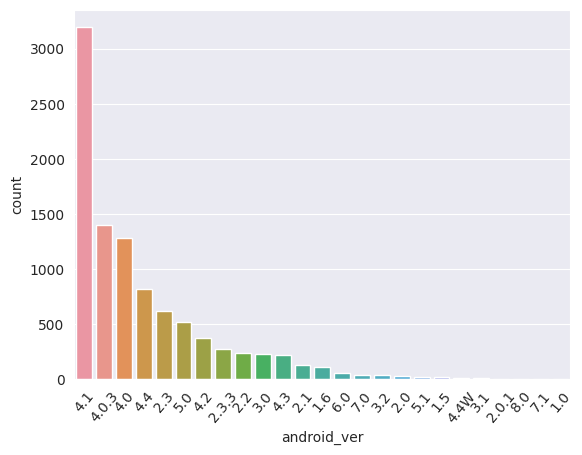

In [83]:
# What is the most supported android version?

most_android_ver = google_df["android_ver"].value_counts()

x = most_android_ver.index

sns.set_style("darkgrid")

sns.barplot(x=x,y=most_android_ver)
plt.xticks(rotation = 50);

print(f"the most supported android version is {most_android_ver.index[0]}")

What is the most reted gunara of games?

In [84]:
genres = google_df['genres']

for i in range(len(genres)):
    genres[i] = genres[i].split(";")[-1]

/tmp/ipykernel_883/2234272290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres[i] = genres[i].split(";")[-1]
/tmp/ipykernel_883/2234272290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres[i] = genres[i].split(";")[-1]
/tmp/ipykernel_883/2234272290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres[i] = genres[i].split(";")[-1]
/tmp/ipykernel_883/2234272290.py:4: SettingWithCopyWarning: 
A value is trying to 

the most rated genre is "Sports" with avarge rating of 4.533333333333333


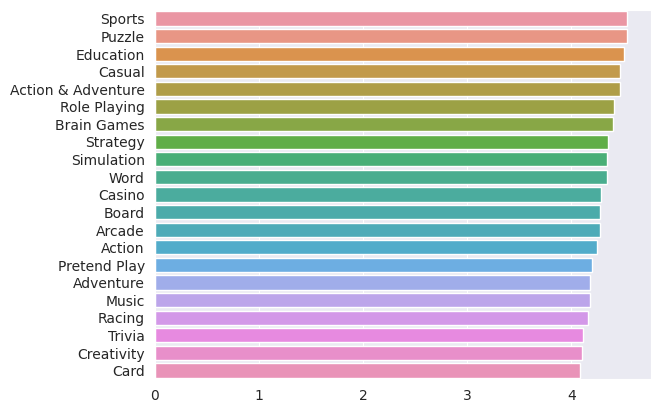

In [85]:
data = dict(google_df.groupby(['category','genres'])["rating"].mean())

data_dict = {}
for key in data:
    key1 = key[0]
    key2 = key[-1]
    if key1 == "GAME":
        data_dict[key2] = data[key]

data_s = pd.Series(data_dict)

data_s.sort_values(ascending=False,inplace=True)

# print(data_s)

x = data_s.index
sns.barplot(y=x, x=data_s) # i have reversed it to be more redable 
# plt.xticks(rotation=90);

print(f'the most rated genre is "{x[0]}" with avarge rating of {data_s[0]}')

3. top 10 socila media apps

                         app_name  rating     reviews
0                        Facebook     4.1  78158306.0
1                       Instagram     4.5  66577313.0
2                        Snapchat     4.0  17014787.0
3                   Facebook Lite     4.3   8606259.0
4                              VK     3.8   5793284.0
5  Tik Tok - including musical.ly     4.4   5637451.0
6                         Google+     4.2   4831125.0
7                       Pinterest     4.6   4305441.0
8    Tango - Live Video Broadcast     4.3   3806669.0
9  Badoo - Free Chat & Dating App     4.3   3781770.0


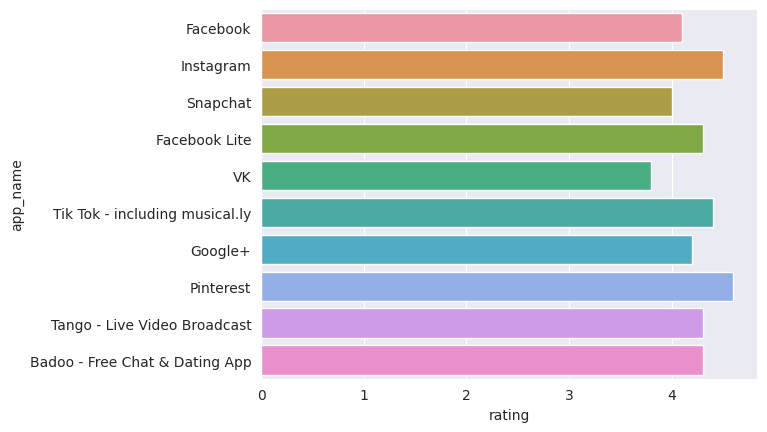

<Axes: xlabel='reviews', ylabel='app_name'>

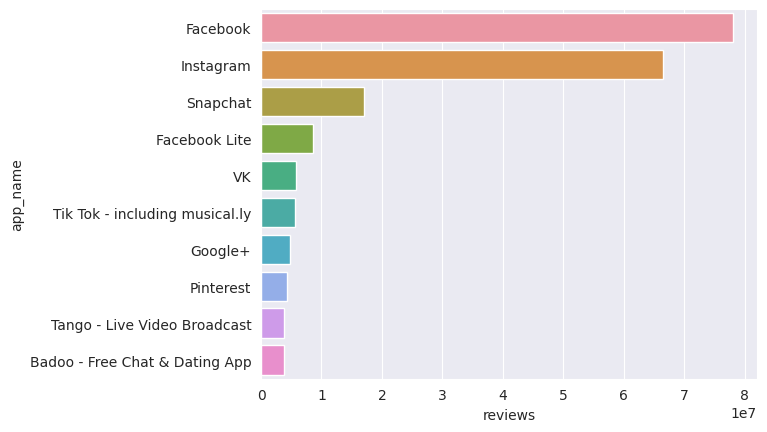

In [86]:
rating = dict(google_df.groupby(['category','app'])[("rating")].mean())
n_reviews = dict(google_df.groupby(['category','app'])["reviews"].mean())

social = []


for i in range(len(rating)):

    key = list(rating.keys())[i]
    app_type = key[0]
    app_name = key[1]

    dic = {}

    if app_type == "SOCIAL" :

        dic["app_name"] = app_name
        dic["rating"] = rating[key]
        dic["reviews"] = n_reviews[key]

        social.append(dic)

social_df = pd.DataFrame(social)

sorted_ = social_df.sort_values(["reviews","reviews"],ascending=False ,ignore_index=True)

print(sorted_.head(10))

d = sorted_.head(10)

sns.barplot(data=d, y="app_name", x="rating")
plt.show()
sns.barplot(data=d, y="app_name", x="reviews")

4. top 10 games on the store

                                   app_name  rating     reviews
0                            Clash of Clans     4.6  44891723.0
1                            Subway Surfers     4.5  27722264.0
2                              Clash Royale     4.6  23133508.0
3                          Candy Crush Saga     4.4  22426677.0
4                            My Talking Tom     4.5  14891223.0
5                               8 Ball Pool     4.5  14198297.0
6                            Shadow Fight 2     4.6  10979062.0
7                                       Pou     4.3  10485308.0
8                                Pokémon GO     4.1  10424925.0
9  Minion Rush: Despicable Me Official Game     4.5  10216538.0


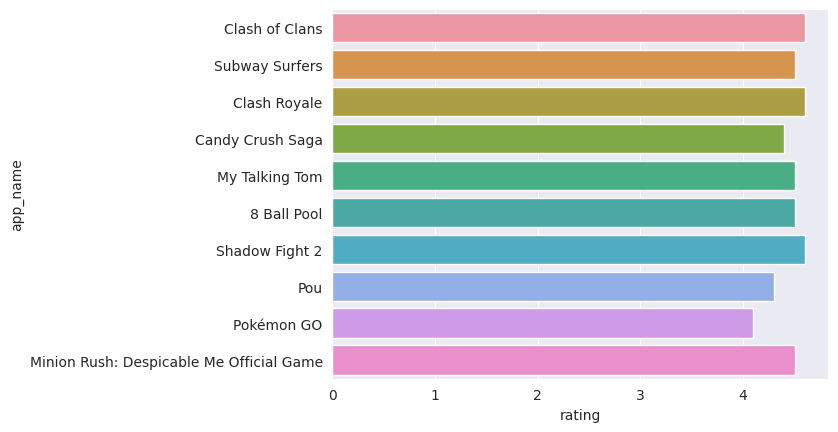

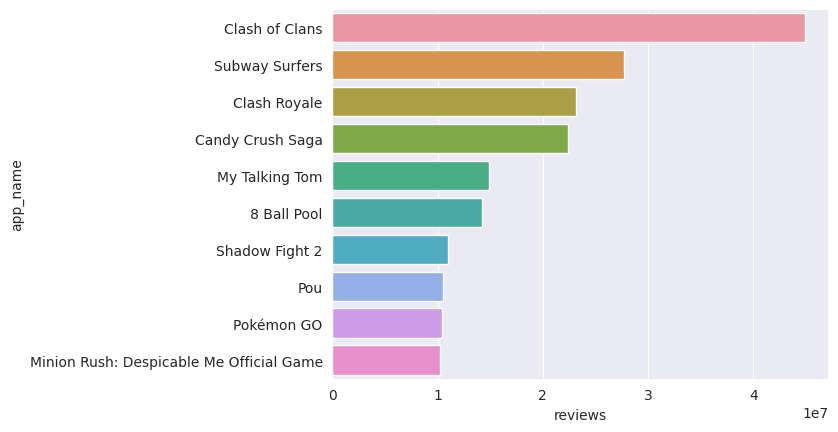

In [87]:

data = dict(google_df.groupby(['category',"app"])["rating"].mean())

n_reviews = dict(google_df.groupby(['category','app'])["reviews"].mean())


games = []

for i in range(len(data)):

    key = list(data.keys())[i]
    app_type = key[0]
    app_name = key[1]

    dic = {}

    if app_type == "GAME" :

        dic["app_name"] = app_name
        dic["rating"] = data[key]
        dic["reviews"] = n_reviews[key]

        games.append(dic)

games_df = pd.DataFrame(games)

# print(games_df)

games_df.sort_values(["reviews","rating"],ascending=False,inplace=True, ignore_index=True)

d = games_df.head(10)

print(d)

sns.barplot(data=d, y="app_name", x="rating");
plt.show();
sns.barplot(data=d, y="app_name", x="reviews");

5. the most expensev apps and its ratings


In [88]:
google_df.loc[:,["app","rating","price","installs"]][google_df["price"].max() == google_df['price']]

,app,rating,price,installs
3469,I'm Rich - Trump Edition,3.6,400.0,10000


6. the best 10 action games?

                                           app_name  rating     reviews
0                                    Shadow Fight 2     4.6  10979062.0
1                         Mobile Legends: Bang Bang     4.4   8219586.0
2                                      Temple Run 2     4.3   8118609.0
3  Sniper 3D Gun Shooter: Free Shooting Games - FPS     4.6   7671249.0
4                                  Garena Free Fire     4.5   5465624.0
5                                        slither.io     4.4   5234162.0
6                       Gangstar Vegas - mafia game     4.5   4830407.0
7    Pixel Gun 3D: Survival shooter & Battle Royale     4.5   4487182.0
8                                       Crossy Road     4.5   4230886.0
9                               DEER HUNTER CLASSIC     4.4   3941129.0


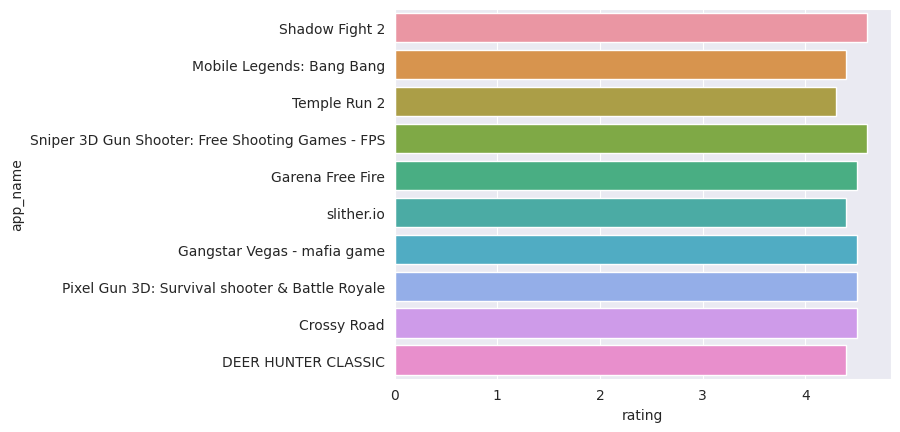

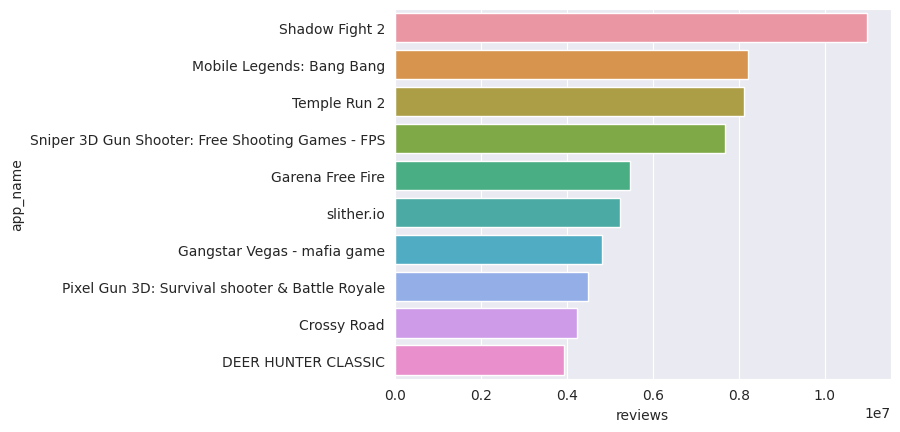

In [90]:
data = dict(google_df.groupby(['category','genres','app'])["rating"].mean())
n_reviews = dict(google_df.groupby(['category','genres','app'])["reviews"].mean())

games = []

for i in range(len(data)):

    key = list(data.keys())[i]
    test = key[:-1]
    app_type = key[0]
    app_name = key[2]
    game_type = key[1]

    dic = {}

    if app_type == "GAME":

        if game_type == "Action":

            dic["app_name"] = app_name
            dic["rating"] = data[key]
            dic["reviews"] = n_reviews[key]

            games.append(dic)
        else:
            pass

games_df = pd.DataFrame(games)

games_df.sort_values(["reviews","rating"],ascending=False,inplace=True, ignore_index=True)

d = games_df.head(10)

print(d)

sns.barplot(data=d, y="app_name", x="rating");
plt.show();
sns.barplot(data=d, y="app_name", x="reviews");

7. what is the avarge size for games 

In [ ]:
data = dict(google_df.groupby(["category"])['size(kb)'].mean())

print(f'The averge size of games is {data["GAME"]/1000} mg')

The averge size of games is 37.5749070907195 mg


8. what is the averge size for social media

In [ ]:
print(f'The averge size of Social media apps is {data["SOCIAL"]/1000} mg')

The averge size of Social media apps is 10.512624267782428 mg


9. what is the most number of reviews and for which app

In [ ]:
google_df[google_df['reviews']== google_df['reviews'].max()]

,app,category,rating,reviews,installs,type,price,content_rating,genres,android_ver,size(kb)
2002,Facebook,SOCIAL,4.1,78158306,1000000000,0,0.0,Teen,Social,4.1,4.3


10. what is the % of paid and free apps

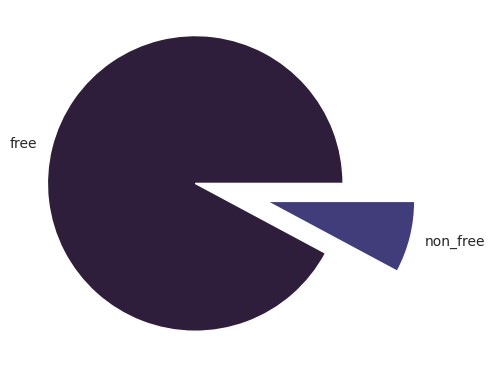

In [93]:
pi = google_df['type'].value_counts()

plt.pie(pi,colors=theme,labels=["free","non_free"], explode=[0.3,0.2]);